# Eda and data cleaning

### Here i will test different machine learning models and choose one that fits the data I have

- features/independent variable: All columns except Trip_price

- label/target/dependent variable: Trip_price

In [30]:
import pandas as pd
from taxipred.utils.constants import TAXI_CSV_PATH, DATA_PATH
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(TAXI_CSV_PATH)

df.head(5)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [32]:
df.describe().T.drop(["count"], axis=1)

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


Now I want to see if Time_of_Day, Day_of_Week, Traffic_conditions and Weather make big enough impact on pice to see if they are worth having in my data. I Want to take a look at all object data to see if I can remove some columns or change them somehow. 

Here we see that Time_of_Day have no big impact on the price so we can remove it from the data.

In [33]:
df.groupby("Time_of_Day")["Trip_Price"].mean()


Time_of_Day
Afternoon    57.958716
Evening      56.404504
Morning      55.949429
Night        56.304401
Name: Trip_Price, dtype: float64

In [34]:
df.groupby("Day_of_Week")["Trip_Price"].mean()

Day_of_Week
Weekday    58.012418
Weekend    55.001961
Name: Trip_Price, dtype: float64

In [35]:
df.groupby("Traffic_Conditions")["Trip_Price"].mean()


Traffic_Conditions
High      65.059510
Low       55.597238
Medium    54.547422
Name: Trip_Price, dtype: float64

In [36]:
df.groupby("Weather")["Trip_Price"].mean()

Weather
Clear    55.809128
Rain     59.769260
Snow     57.815842
Name: Trip_Price, dtype: float64

In [37]:
df = df.drop(["Time_of_Day"], axis=1).copy()
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...
995,5.49,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


I want to see if the Per_Km_Rate and Per_Minute_Rate are accurate to the Trip_price. 

In [38]:
df["calculated_distance_price"] = (
    df["Trip_Distance_km"] * df["Per_Km_Rate"])


In [39]:
df["calculated_time_price"] = (
    df["Trip_Duration_Minutes"] * df["Per_Minute_Rate"])

In [40]:
df[["Trip_Price", "calculated_distance_price"]].describe().T.drop(["count"], axis= 1)

,mean,std,min,25%,50%,75%,max
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689
calculated_distance_price,33.384276,28.790107,0.7874,13.54190,27.4400,45.25560,253.093259


In [41]:
df[["Trip_Price", "calculated_time_price"]].describe().T.drop(["count"], axis= 1)

,mean,std,min,25%,50%,75%,max
Trip_Price,56.874773,40.469791,6.1269,33.742650,50.0745,69.09935,332.043689
calculated_time_price,18.094635,12.393130,0.7910,8.682975,14.8875,25.36935,55.855000


Neither Per_Km_Rate or Per_Minute_Rate are accurate so I will remove them from the data. I will also remove the new column I just made. 

In [42]:
df = df.drop(["Per_Km_Rate", "Per_Minute_Rate", "calculated_distance_price", "calculated_time_price"], axis=1).copy()
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,3.0,Low,Clear,3.56,53.82,36.2624
1,47.59,Weekday,1.0,High,Clear,NaN,40.57,NaN
2,36.87,Weekend,1.0,High,Clear,2.70,37.27,52.9032
3,30.33,Weekday,4.0,Low,NaN,3.48,116.81,36.4698
4,NaN,Weekday,3.0,High,Clear,2.93,22.64,15.6180
...,...,...,...,...,...,...,...,...
995,5.49,Weekend,4.0,Medium,Clear,2.39,58.39,34.4049
996,45.95,Weekday,4.0,Medium,Clear,3.12,61.96,62.1295
997,7.70,Weekday,3.0,Low,Rain,2.08,54.18,33.1236
998,47.56,Weekday,1.0,Low,Clear,2.67,114.94,61.2090


I want to see how many NaN values I have

In [43]:
df.isna().sum()

Trip_Distance_km         50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

### Now I removed all of the NaN values except the ones in Trip_price

In [44]:
df = df.dropna(subset=df.columns.drop("Trip_Price")).copy()
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,3.0,Low,Clear,3.56,53.82,36.2624
2,36.87,Weekend,1.0,High,Clear,2.70,37.27,52.9032
5,8.64,Weekend,2.0,Medium,Clear,2.55,89.33,60.2028
6,3.85,Weekday,4.0,High,Rain,3.51,5.05,11.2645
8,30.45,Weekday,3.0,High,Clear,2.77,110.33,NaN
...,...,...,...,...,...,...,...,...
995,5.49,Weekend,4.0,Medium,Clear,2.39,58.39,34.4049
996,45.95,Weekday,4.0,Medium,Clear,3.12,61.96,62.1295
997,7.70,Weekday,3.0,Low,Rain,2.08,54.18,33.1236
998,47.56,Weekday,1.0,Low,Clear,2.67,114.94,61.2090


Now I just want to double check if every NaN value is deleted, except Trip Price

In [45]:
df.isna().sum()

Trip_Distance_km          0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Trip_Duration_Minutes     0
Trip_Price               31
dtype: int64

Now I will look for outliers

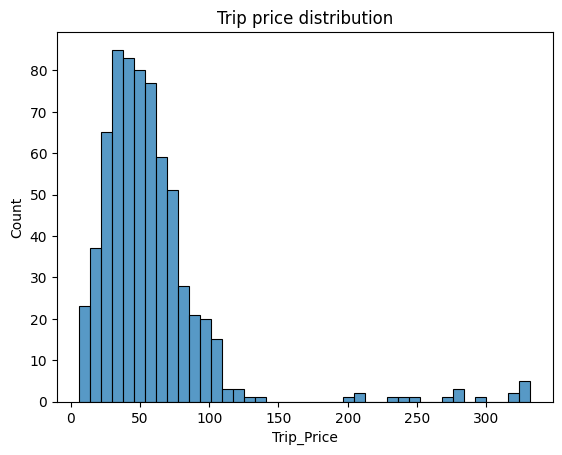

In [46]:
sns.histplot(df["Trip_Price"])
plt.title("Trip price distribution")
plt.show()

as we see 200 + are outliers so I will remove them from the data to make the data more accurate, I did the pipeline code with help of Ai, because I wanted to remove all the outliers but it removed my NaN values as well and I wanted to keep them

In [47]:
df = df[(df["Trip_Price"] < 200) | (df["Trip_Price"].isna())].copy()
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,3.0,Low,Clear,3.56,53.82,36.2624
2,36.87,Weekend,1.0,High,Clear,2.70,37.27,52.9032
5,8.64,Weekend,2.0,Medium,Clear,2.55,89.33,60.2028
6,3.85,Weekday,4.0,High,Rain,3.51,5.05,11.2645
8,30.45,Weekday,3.0,High,Clear,2.77,110.33,NaN
...,...,...,...,...,...,...,...,...
995,5.49,Weekend,4.0,Medium,Clear,2.39,58.39,34.4049
996,45.95,Weekday,4.0,Medium,Clear,3.12,61.96,62.1295
997,7.70,Weekday,3.0,Low,Rain,2.08,54.18,33.1236
998,47.56,Weekday,1.0,Low,Clear,2.67,114.94,61.2090


I will remove Base_Fare because it's just a calculation after we know the price. 

In [48]:
df = df.drop(["Base_Fare"], axis=1).copy()
df

,Trip_Distance_km,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,3.0,Low,Clear,53.82,36.2624
2,36.87,Weekend,1.0,High,Clear,37.27,52.9032
5,8.64,Weekend,2.0,Medium,Clear,89.33,60.2028
6,3.85,Weekday,4.0,High,Rain,5.05,11.2645
8,30.45,Weekday,3.0,High,Clear,110.33,NaN
...,...,...,...,...,...,...,...
995,5.49,Weekend,4.0,Medium,Clear,58.39,34.4049
996,45.95,Weekday,4.0,Medium,Clear,61.96,62.1295
997,7.70,Weekday,3.0,Low,Rain,54.18,33.1236
998,47.56,Weekday,1.0,Low,Clear,114.94,61.2090


I did this describe so I can put some values in my data_processing.py

In [49]:
df.describe().T.drop(["count"], axis= 1)

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,25.148492,14.286783,1.2500,12.56000,25.6500,37.5550,49.9900
Passenger_Count,2.524158,1.098086,1.0000,2.00000,3.0000,3.0000,4.0000
Trip_Duration_Minutes,62.118477,32.536187,5.0100,36.10000,62.2300,89.1800,119.8400
Trip_Price,51.601242,24.021001,6.1269,33.16815,48.6149,65.9871,138.6425


In [50]:
df.to_csv(DATA_PATH/"cleaned_taxi_trip_pricing.csv", index= False)